<a href="https://colab.research.google.com/github/RosminVarghese/Mini-Project/blob/main/Image_Classifier_project_using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#gives the execution time for each cell
!pip install ipython-autotime
%load_ext autotime  

time: 1.85 ms (started: 2021-03-28 11:36:51 +00:00)


In [2]:
#os- required as we'll be switching between folders
import os
#matplotlib- to display images
import matplotlib.pyplot as plt
#numpy- for numerical computing
import numpy as np
#skimage- scikit image(for image processing)- imread to read the images
from skimage.io import imread
#imresize- to resize the image
from skimage.transform import resize

time: 857 ms (started: 2021-03-28 11:53:05 +00:00)


In [3]:
target=[]
#data input (2d)
images= []
#1d data (2d data converted to 1d)
flat_data =[]

DATADIR = '/content/drive/MyDrive/Images for ML model'
CATEGORIES = ['Mangoes', 'bicycle', 'icecream']


for category in CATEGORIES:
  class_num = CATEGORIES.index(category)  #Label encoding the values
  path = os.path.join(DATADIR, category)  #to get the path to use the three image folders
  for img in os.listdir(path):
    #read each image values from the given path with its name
    img_array = imread(os.path.join(path,img))
    #print(img_array) #gives the matrix form of each image 
    #print(img_array.shape)  
    
    #plt.imshow(img_array) #to print or display one image
    #break

    img_resized = resize(img_array,(150,150,3))   #skimage normalizes the value from 0-1 and resizes the image to the given dimension. store the ans in img_resized
    flat_data.append(img_resized.flatten())   #flatten the resized data and append to the flat_data list
    images.append(img_resized)
    target.append(class_num)

#create numpy arrays
flat_data = np.array(flat_data)
target = np.array(target) 
images = np.array(images)                


time: 22 s (started: 2021-03-28 11:54:21 +00:00)


<BarContainer object of 3 artists>

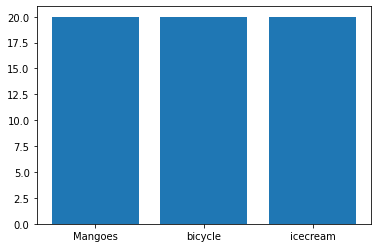

time: 184 ms (started: 2021-03-28 11:54:43 +00:00)


In [4]:
unique, count= np.unique(target, return_counts=True)
plt.bar(CATEGORIES, count)

In [5]:
#split training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data, target, test_size=0.3, random_state=120)


time: 169 ms (started: 2021-03-28 11:55:07 +00:00)


In [6]:
#SVM classifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000], 'kernel':['linear']},
              {'C':[1,10,100,1000], 'gamma':[0.001,0.0001], 'kernel':['rbf']}
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 53.9 s (started: 2021-03-28 11:55:45 +00:00)


In [7]:
#obtained output
y_pred = clf.predict(x_test)
y_pred

array([2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 1, 0])

time: 92.2 ms (started: 2021-03-28 11:56:40 +00:00)


In [8]:
y_test

array([2, 0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 1, 1, 2, 2, 0, 1, 2])

time: 6.43 ms (started: 2021-03-28 11:56:40 +00:00)


In [9]:
#Model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_pred, y_test)

0.7222222222222222

time: 5.28 ms (started: 2021-03-28 11:56:46 +00:00)


In [10]:
confusion_matrix(y_pred, y_test)

array([[5, 0, 1],
       [1, 4, 2],
       [1, 0, 4]])

time: 9.52 ms (started: 2021-03-28 11:57:06 +00:00)


In [11]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       1.00      0.57      0.73         7
           2       0.57      0.80      0.67         5

    accuracy                           0.72        18
   macro avg       0.76      0.73      0.72        18
weighted avg       0.79      0.72      0.72        18

time: 7.12 ms (started: 2021-03-28 11:57:25 +00:00)


In [12]:
#Using Pickle library
import pickle
pickle.dump(clf,open('img_model.p', 'wb'))  

time: 31.8 ms (started: 2021-03-28 11:57:49 +00:00)


In [13]:
model = pickle.load(open('img_model.p', 'rb'))

time: 26.4 ms (started: 2021-03-28 11:58:04 +00:00)


Enter your urlhttps://th.bing.com/th/id/OIP.SE7f2EN7m8l8t8C-KhCP-wHaE8?w=264&h=180&c=7&o=5&dpr=1.25&pid=1.7
(225, 330, 3)
[0]
Mangoes
PREDICTED OUTPUT: Mangoes
Mangoes : 58.811153923797285%
bicycle : 9.716874557945603%
icecream : 31.47197151825712%


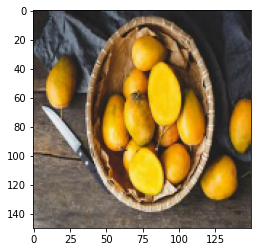

time: 3.25 s (started: 2021-03-28 12:01:31 +00:00)


In [24]:
flat_data_new =[]
url = input('Enter your url')
img_new = imread(url)
img_resized_new = resize(img_new, (150,150,3))
flat_data_new.append(img_resized_new.flatten())
flat_data_new = np.array(flat_data_new)
print(img_new.shape)
plt.imshow(img_resized_new)
y_out = model.predict(flat_data_new)
print(y_out)
y_out = CATEGORIES[y_out[0]]
print(y_out)
print(f'PREDICTED OUTPUT: {y_out}')
q = model.predict_proba(flat_data_new)
for index, item in enumerate(CATEGORIES):
  print(f'{item} : {q[0][index]*100}%')